# PEP 558 - Homework #3

## Circuit 1

In [18]:
#QISKIT
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
quantum_circuit = QuantumCircuit(qreg_q, creg_c)

quantum_circuit.x(qreg_q[0])
quantum_circuit.x(qreg_q[1])
quantum_circuit.barrier(qreg_q[0], qreg_q[1])
quantum_circuit.x(qreg_q[0])
quantum_circuit.barrier(qreg_q[0], qreg_q[1])
quantum_circuit.h(qreg_q[0])
quantum_circuit.barrier(qreg_q[0], qreg_q[1])
quantum_circuit.cx(qreg_q[0], qreg_q[1])
quantum_circuit.barrier(qreg_q[0], qreg_q[1])
quantum_circuit.h(qreg_q[1])
quantum_circuit.barrier(qreg_q[0], qreg_q[1])
quantum_circuit.measure(qreg_q[1], creg_c[1])
quantum_circuit.measure(qreg_q[0], creg_c[0])

In [19]:
quantum_circuit.draw()

┌───┐ ░ ┌───┐ ░ ┌───┐ ░       ░       ░    ┌─┐
q_0: ┤ X ├─░─┤ X ├─░─┤ H ├─░───■───░───────░────┤M├
     ├───┤ ░ └───┘ ░ └───┘ ░ ┌─┴─┐ ░ ┌───┐ ░ ┌─┐└╥┘
q_1: ┤ X ├─░───────░───────░─┤ X ├─░─┤ H ├─░─┤M├─╫─
     └───┘ ░       ░       ░ └───┘ ░ └───┘ ░ └╥┘ ║ 
c: 2/═════════════════════════════════════════╩══╩═
                                              1  0

### IBM Quantum Composer output:

|11>

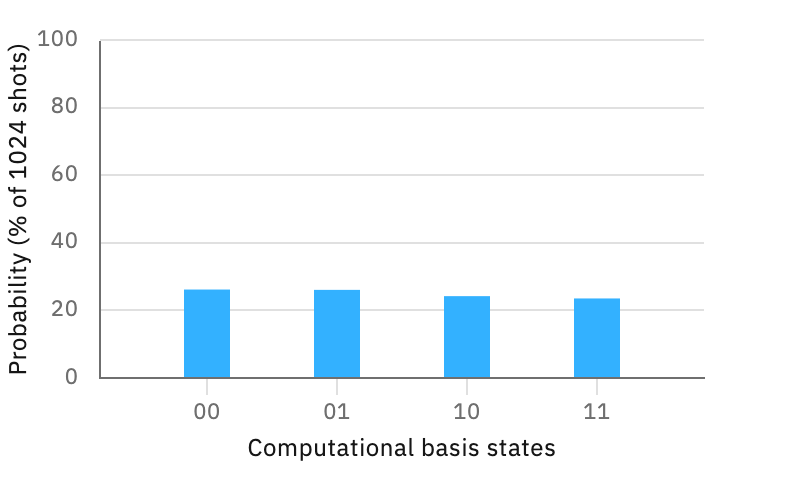

In [2]:
# As we can see, the circuit is now built according to the image. We can now measure the qubit at the quantum register.
# For this we have two methods, AER(quantum computer simulator) and IBMQ (IBM's quantum computer)

#AER
from qiskit.providers.aer import QasmSimulator
backend= QasmSimulator()
job = backend.run(quantum_circuit,shots=1024)
result = job.result()
print(result)





Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='e5325326-140c-49e0-845d-63d211dd80f8', job_id='fef27edc-b4ad-46d3-b6ab-bc9f7b47fcff', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 261, '0x0': 243, '0x3': 267, '0x2': 253}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-85', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=3704964573, metadata={'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.000626958, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'device': 'CPU', 'active_input_qubits': [0, 1], 'measure_sampling': True, 'num_clbits': 2, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.001617958)], date=2023-02

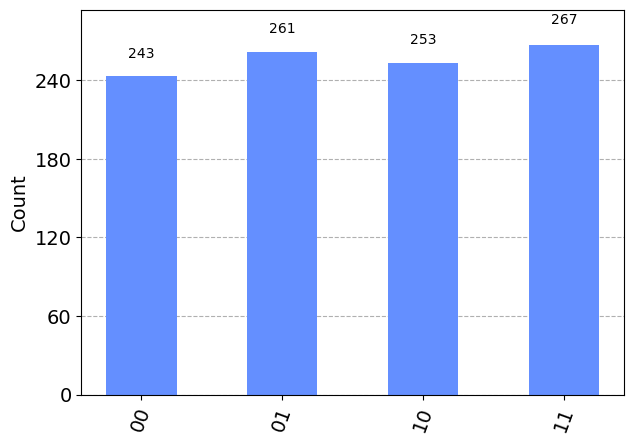

In [3]:
# We can plot a histogram to see the values
from qiskit.visualization import plot_histogram
counts = result.get_counts(quantum_circuit)
plot_histogram(counts)


In [4]:
# Let us see the counts
print(counts)


{'01': 261, '00': 243, '11': 267, '10': 253}


['ibmq_qasm_simulator', 'ibmq_lima', 'ibmq_belem', 'ibmq_quito', 'simulator_statevector', 'simulator_mps', 'simulator_extended_stabilizer', 'simulator_stabilizer', 'ibmq_manila', 'ibm_nairobi', 'ibm_oslo']
Job Status: job has successfully run


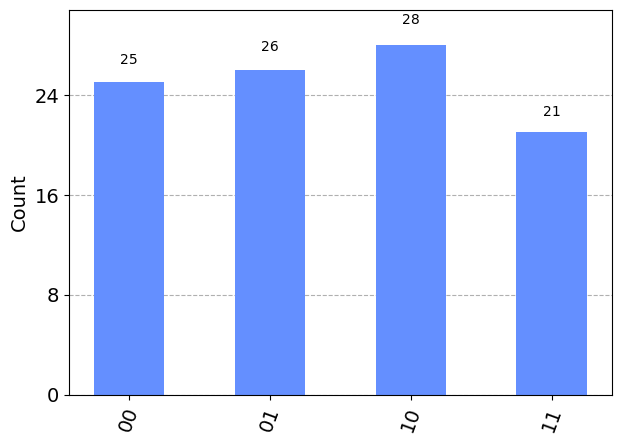

In [5]:
#IBMQ

# Now let us see the working of this circuit on a real quantum machine.
# Note: You need to create an IBMQ account before proceeding.
from qiskit import *
from qiskit import IBMQ

# This step is for first time users.
# 'IBMQ.save_account(TOKEN)'
# For this token, visit https://quantum-computing.ibm.com/ create an account with any email id
# and login to view the token and copy it.

# This step is after you have created and saved your account.
IBMQ.load_account()

# To view all the poviders
print([backend.name() for backend in IBMQ.providers()[0].backends()])




# We can select any provider, but ibmq_manila will work.
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub = 'ibm-q',group = 'open',project='main')
backend = provider.get_backend('ibmq_lima')
job = execute(quantum_circuit, backend=backend, shots=100)
job_monitor(job)
results = job.result()




# Plot histogram of the outputs recieved.
counts = results.get_counts(quantum_circuit)
plot_histogram(counts)

## Circuit 2

In [21]:
#QISKIT
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
quantum_circuit = QuantumCircuit(qreg_q, creg_c)

quantum_circuit.h(qreg_q[0])
quantum_circuit.barrier(qreg_q[0], qreg_q[1])
quantum_circuit.cx(qreg_q[0], qreg_q[1])
quantum_circuit.barrier(qreg_q[0], qreg_q[1])
quantum_circuit.measure(qreg_q[0], creg_c[0])
quantum_circuit.measure(qreg_q[1], creg_c[1])

In [22]:
quantum_circuit.draw()

┌───┐ ░       ░ ┌─┐   
q_0: ┤ H ├─░───■───░─┤M├───
     └───┘ ░ ┌─┴─┐ ░ └╥┘┌─┐
q_1: ──────░─┤ X ├─░──╫─┤M├
           ░ └───┘ ░  ║ └╥┘
c: 2/═════════════════╩══╩═
                      0  1

### IBM Quantum Composer output:

|00>

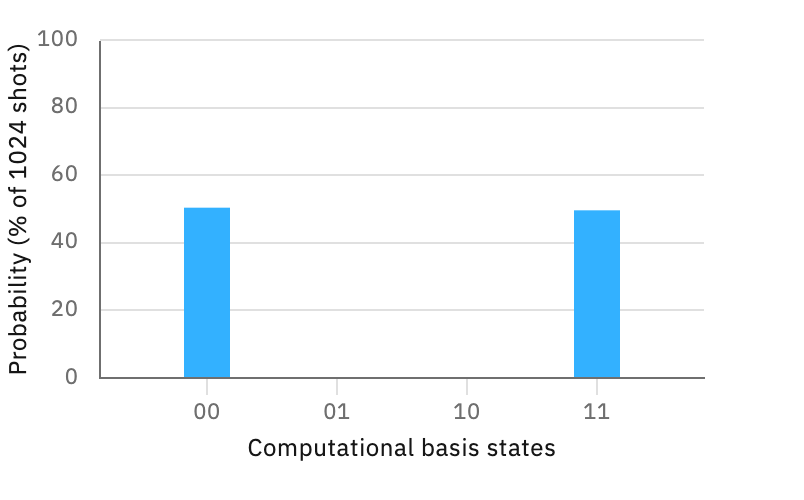

In [7]:
# As we can see, the circuit is now built according to the image. We can now measure the qubit at the quantum register.
# For this we have two methods, AER(quantum computer simulator) and IBMQ (IBM's quantum computer)

#AER
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
job = backend.run(quantum_circuit,shots=1024)
result = job.result()
print(result)





Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='79d1e533-0972-44ba-a768-8550068dbf2a', job_id='a9ab9cbc-03dd-4645-a51f-005cf329f949', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 533, '0x0': 491}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-99', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=4007952906, metadata={'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.000793958, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'device': 'CPU', 'active_input_qubits': [0, 1], 'measure_sampling': True, 'num_clbits': 2, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.001740584)], date=2023-02-14T18:46:33.202333, sta

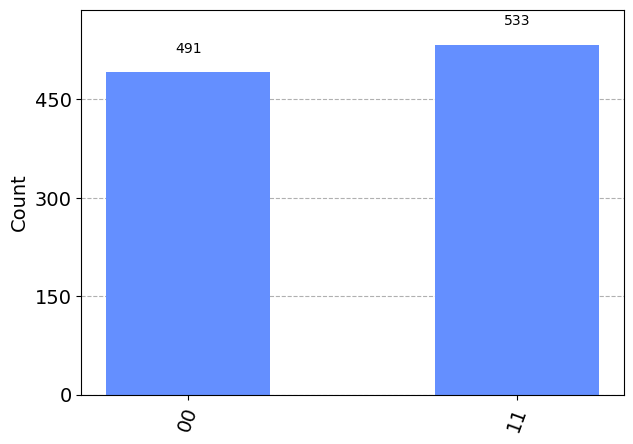

In [8]:
# We can plot a histogram to see the values
from qiskit.visualization import plot_histogram
counts = result.get_counts(quantum_circuit)
plot_histogram(counts)


In [9]:
# Let us see the counts
print(counts)


{'11': 533, '00': 491}


ibmqfactory.load_account:WARNING:2023-02-14 18:57:55,728: Credentials are already in use. The existing account in the session will be replaced.


['ibmq_qasm_simulator', 'ibmq_lima', 'ibmq_belem', 'ibmq_quito', 'simulator_statevector', 'simulator_mps', 'simulator_extended_stabilizer', 'simulator_stabilizer', 'ibmq_manila', 'ibm_nairobi', 'ibm_oslo']
Job Status: job has successfully run


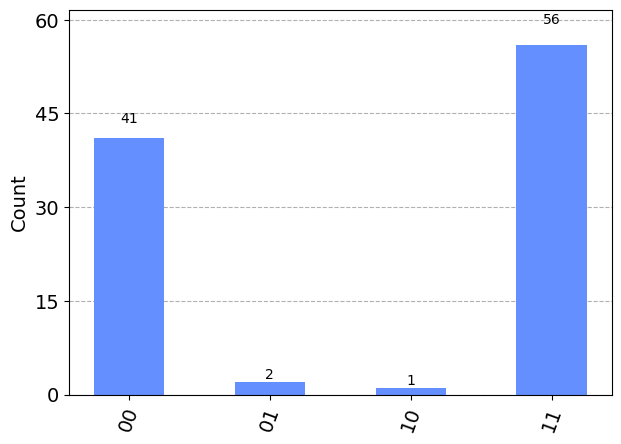

In [11]:
#IBMQ

# Now let us see the working of this circuit on a real quantum machine.
# Note: You need to create an IBMQ account before proceeding.
from qiskit import *
from qiskit import IBMQ

# This step is for first time users.
# 'IBMQ.save_account(TOKEN)'
# For this token, visit https://quantum-computing.ibm.com/ create an account with any email id
# and login to view the token and copy it.

# This step is after you have created and saved your account.
IBMQ.load_account()

# To view all the poviders
print([backend.name() for backend in IBMQ.providers()[0].backends()])




# We can select any provider, but ibmq_manila will work.
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub = 'ibm-q',group = 'open',project='main')
backend = provider.get_backend('ibmq_lima')
job = execute(quantum_circuit, backend=backend, shots=100)
job_monitor(job)
results = job.result()




# Plot histogram of the outputs recieved.
counts = results.get_counts(quantum_circuit)
plot_histogram(counts)

## Circuit 3

In [24]:
#QISKIT
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(2, 'c')
quantum_circuit = QuantumCircuit(qreg_q, creg_c)

quantum_circuit.h(qreg_q[0])
quantum_circuit.h(qreg_q[0])
quantum_circuit.h(qreg_q[0])
quantum_circuit.x(qreg_q[0])
quantum_circuit.measure(qreg_q[0], creg_c[0])

In [25]:
quantum_circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌─┐
  q: ┤ H ├┤ H ├┤ H ├┤ X ├┤M├
     └───┘└───┘└───┘└───┘└╥┘
c: 2/═════════════════════╩═
                          0

### IBM Quantum Composer output:

|0>

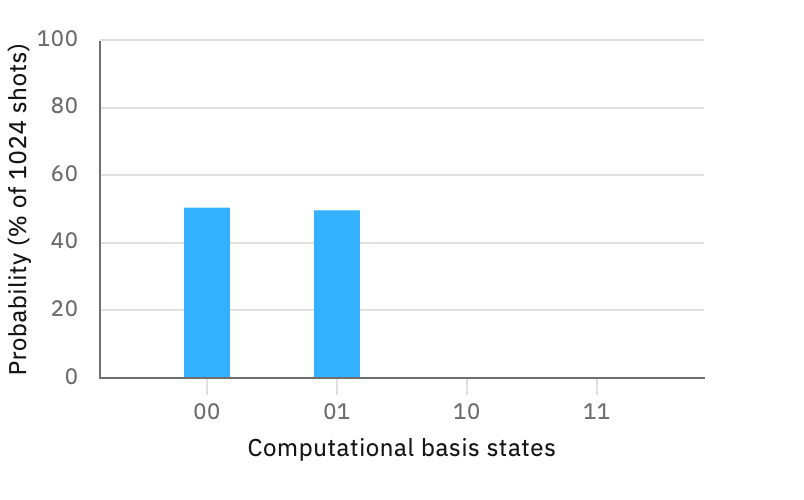

In [13]:
# As we can see, the circuit is now built according to the image. We can now measure the qubit at the quantum register.
# For this we have two methods, AER(quantum computer simulator) and IBMQ (IBM's quantum computer)

#AER
from qiskit.providers.aer import QasmSimulator
backend= QasmSimulator()
job = backend.run(quantum_circuit,shots=1024)
result = job.result()
print(result)


Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='48d450fe-96b0-43b1-8ba6-db0d7bf1c3f2', job_id='7925d0d1-300c-435b-b016-1ac87dc0255e', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 483, '0x0': 541}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=1, name='circuit-112', qreg_sizes=[['q', 1]], qubit_labels=[['q', 0]]), status=DONE, seed_simulator=968375662, metadata={'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.001257042, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'device': 'CPU', 'active_input_qubits': [0], 'measure_sampling': True, 'num_clbits': 2, 'input_qubit_map': [[0, 0]], 'num_qubits': 1, 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.003157458)], date=2023-02-14T19:39:20.112907, status=COMPLETED, header

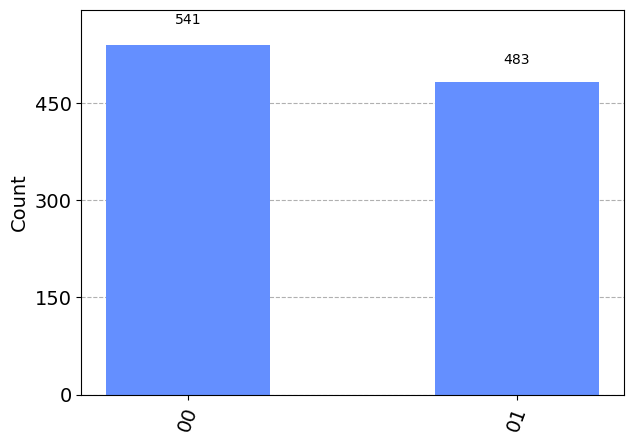

In [14]:
# We can plot a histogram to see the values
from qiskit.visualization import plot_histogram
counts = result.get_counts(quantum_circuit)
plot_histogram(counts)


In [15]:
# Let us see the counts
print(counts)

{'01': 483, '00': 541}


ibmqfactory.load_account:WARNING:2023-02-14 19:39:23,933: Credentials are already in use. The existing account in the session will be replaced.


['ibmq_qasm_simulator', 'ibmq_lima', 'ibmq_belem', 'ibmq_quito', 'simulator_statevector', 'simulator_mps', 'simulator_extended_stabilizer', 'simulator_stabilizer', 'ibmq_manila', 'ibm_nairobi', 'ibm_oslo']
Job Status: job has successfully run


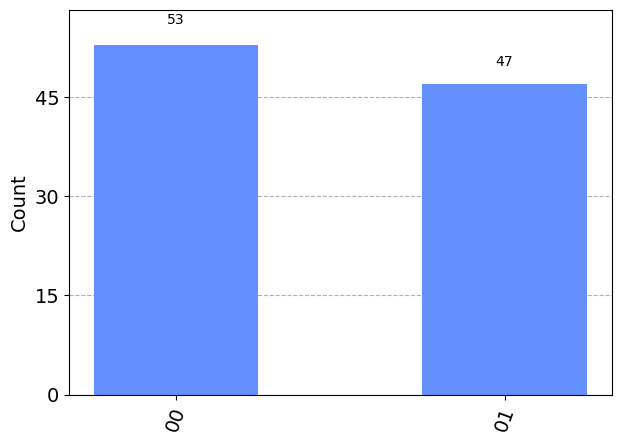

In [16]:
#IBMQ

# Now let us see the working of this circuit on a real quantum machine.
# Note: You need to create an IBMQ account before proceeding.
from qiskit import *
from qiskit import IBMQ

# This step is for first time users.
# 'IBMQ.save_account(TOKEN)'
# For this token, visit https://quantum-computing.ibm.com/ create an account with any email id
# and login to view the token and copy it.

# This step is after you have created and saved your account.
IBMQ.load_account()

# To view all the poviders
print([backend.name() for backend in IBMQ.providers()[0].backends()])




# We can select any provider, but ibmq_manila will work.
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub = 'ibm-q',group = 'open',project='main')
backend = provider.get_backend('ibmq_lima')
job = execute(quantum_circuit, backend=backend, shots=100)
job_monitor(job)
results = job.result()




# Plot histogram of the outputs recieved.
counts = results.get_counts(quantum_circuit)
plot_histogram(counts)

